## Trigonometric interpolation

**Notation**

| symbol | meaning |
|---|---|
| $\bar u$ | complex conjugate of $u$ (element-wise complex conjugate for vector or matrix) |
| $i$ | $=\sqrt{-1}$ imaginary unit |
| $v^H$, $A^H$ | $\overline{v}^T$, $\overline{A}^T$, where $v$ and $A$ are complex vector and matrix respectively (called *conjugate transpose*) |
| $(u, v)$ | $v^H u = \sum_{j=1}^n u_j \overline{v_j}$, where $u,v\in C^n$ (Complex dot-product) |
| $\lVert v \rVert$ | $\sqrt{(v, v)}$, where $v\in C^n$ (2-norm of complex vector) |
<!-- | $\mathfrak{i}$ | $=\sqrt{-1}$ imaginary unit (watch the font! $i$ vs $\mathfrak{i}=\sqrt{-1}$) | -->


### FFT and signal processing

**Theorem** (Orthogonal Function Interpolation; Sauer (2017) p. 506)

Let $f_0(t), \ldots, f_{n-1}(t)$ be functions of $t$ and $t_0, \ldots, t_{n-1}$ be real numbers. Assume that the $n \times n$ matrix
$$
A=\left[\begin{array}{cccc}
f_0\left(t_0\right) & f_0\left(t_1\right) & \cdots & f_0\left(t_{n-1}\right) \\
f_1\left(t_0\right) & f_1\left(t_1\right) & \cdots & f_1\left(t_{n-1}\right) \\
\vdots & \vdots & & \vdots \\
f_{n-1}\left(t_0\right) & f_{n-1}\left(t_1\right) & \cdots & f_{n-1}\left(t_{n-1}\right)
\end{array}\right]
$$
is a real $n \times n$ orthogonal matrix. If $y=A x$, the function
$$
F(t)=\sum_{k=0}^{n-1} y_k f_k(t)
$$
interpolates $\left(t_0, x_0\right), \ldots,\left(t_{n-1}, x_{n-1}\right)$, that is $F\left(t_j\right)=x_j$ for $j=0, \ldots, n-1$.


Proof. The fact $y=A x$ implies that
$$
x=A^{-1} y=A^T y,
$$
and it follows that
$$
x_j=\sum_{k=0}^{n-1} a_{k j} y_k=\sum_{k=0}^{n-1} y_k f_k\left(t_j\right)
$$
for $j=0, \ldots, n-1$, which completes the proof.

**Lemma** (Sauer (2017) p. 506)

Let $n \geq 1$ and $k, l$ be integers. Then
$$
\begin{aligned}
& \sum_{j=0}^{n-1} \cos \frac{2 \pi j k}{n} \cos \frac{2 \pi j l}{n}= \begin{cases}n & \text { if both }(k-l) / n \text { and }(k+l) / n \text { are integers } \\
\frac{n}{2} & \text { if exactly one of }(k-l) / n \text { and }(k+l) / n \text { is an integer } \\
0 & \text { if neither is an integer }\end{cases} \\
& \sum_{j=0}^{n-1} \cos \frac{2 \pi j k}{n} \sin \frac{2 \pi j l}{n}=0 \\
& \sum_{j=0}^{n-1} \sin \frac{2 \pi j k}{n} \sin \frac{2 \pi j l}{n}= \begin{cases}0 & \text { if both }(k-l) / n \text { and }(k+l) / n \text { are integers } \\
\frac{n}{2} & \text { if }(k-l) / n \text { is an integer and }(k+l) / n \text { is not } \\
-\frac{n}{2} & \text { if }(k+l) / n \text { is an integer and }(k-l) / n \text { is not } \\
0 & \text { if neither is an integer }\end{cases}
\end{aligned}
$$

Proof: HW problem.

**Example** (Sauer (2017) p. 506)

Let $[c, d]$ be an interval and let $n$ be an even positive integer. Then the lemma shows that the assumptions of the theorem on orthogonal function interpolation are satisfied for $t_j=c+j(d-c) / n, j=0, \ldots, n-1$, and
$$
\begin{aligned}
f_0(t) & =\sqrt{\frac{1}{n}} \\
f_1(t) & =\sqrt{\frac{2}{n}} \cos \frac{2 \pi(t-c)}{d-c} \\
f_2(t) & =\sqrt{\frac{2}{n}} \sin \frac{2 \pi(t-c)}{d-c} \\
f_3(t) & =\sqrt{\frac{2}{n}} \cos \frac{4 \pi(t-c)}{d-c} \\
f_4(t) & =\sqrt{\frac{2}{n}} \sin \frac{4 \pi(t-c)}{d-c} \\
& \vdots \\
f_{n-1}(t) & =\frac{1}{\sqrt{n}} \cos \frac{n \pi(t-c)}{d-c} .
\end{aligned}
$$



The matrix is
$$
A=\sqrt{\frac{2}{n}}\left[\begin{array}{cccc}
\frac{1}{\sqrt{2}} & \frac{1}{\sqrt{2}} & \cdots & \frac{1}{\sqrt{2}} \\
1 & \cos \frac{2 \pi}{n} & \cdots & \cos \frac{2 \pi(n-1)}{n} \\
0 & \sin \frac{2 \pi}{n} & \cdots & \sin \frac{2 \pi(n-1)}{n} \\
\vdots & \vdots & & \vdots \\
\frac{1}{\sqrt{2}} & \frac{1}{\sqrt{2}} \cos \pi & \cdots & \frac{1}{\sqrt{2}} \cos (n-1) \pi
\end{array}\right] .
$$

**Example** (Trigonometirc interpolation revisited; Sauer (2017) p. 501)

Find the trigonometric interpolant for the data $x = [−2.2,−2.8,−6.1,−3.9,0.0,1.1,−0.6,−1.1]$ on the interval $[0,1]$ at evenly spaced nodes $t_j = hj$ ($j=0,1,\cdots,7$), $h=1/8$. This time, use the basis functions that are given above.

$$
A x=\sqrt{\frac{2}{8}}\left[\begin{array}{ccclc}
\frac{1}{\sqrt{2}} & \frac{1}{\sqrt{2}} & \frac{1}{\sqrt{2}} & \cdots & \frac{1}{\sqrt{2}} \\
1 & \cos 2 \pi \frac{1}{8} & \cos 2 \pi \frac{2}{8} & \cdots & \cos 2 \pi \frac{7}{8} \\
0 & \sin 2 \pi \frac{1}{8} & \sin 2 \pi \frac{2}{8} & \cdots & \sin 2 \pi \frac{7}{8} \\
1 & \cos 4 \pi \frac{1}{8} & \cos 4 \pi \frac{2}{8} & \cdots & \cos 4 \pi \frac{7}{8} \\
0 & \sin 4 \pi \frac{1}{8} & \sin 4 \pi \frac{2}{8} & \cdots & \sin 4 \pi \frac{7}{8} \\
1 & \cos 6 \pi \frac{1}{8} & \cos 6 \pi \frac{2}{8} & \cdots & \cos 6 \pi \frac{7}{8} \\
0 & \sin 6 \pi \frac{1}{8} & \sin 6 \pi \frac{2}{8} & \cdots & \sin 6 \pi \frac{7}{8} \\
\frac{1}{\sqrt{2}} & \frac{1}{\sqrt{2}} \cos \pi & \frac{1}{\sqrt{2}} \cos 2 \pi & \cdots & \frac{1}{\sqrt{2}} \cos 7 \pi
\end{array}\right]\left[\begin{array}{r}
-2.2 \\
-2.8 \\
-6.1 \\
-3.9 \\
0.0 \\
1.1 \\
-0.6 \\
-1.1
\end{array}\right]
\approx
\left[\begin{array}{r}
-5.5154 \\
-1.4889 \\
-5.1188 \\
2.2500 \\
1.6500 \\
-0.7111 \\
0.3812 \\
-0.7778
\end{array}\right] .
$$

The formula (10.26) gives the interpolating function,
$$
\begin{aligned}
P(t)= & -1.95-0.7445 \cos 2 \pi t-2.5594 \sin 2 \pi t \\
& +1.125 \cos 4 \pi t+0.825 \sin 4 \pi t \\
& -0.3555 \cos 6 \pi t+0.1906 \sin 6 \pi t \\
& -0.2750 \cos 8 \pi t,
\end{aligned}
$$

This agrees with the one obtained from DFT with real data.

$$
\begin{aligned}
P_8(t)= & \frac{-5.5154}{\sqrt{8}}-\frac{1.0528}{\sqrt{2}} \cos 2 \pi t-\frac{3.6195}{\sqrt{2}} \sin 2 \pi t \\
& +\frac{1.5910}{\sqrt{2}} \cos 4 \pi t+\frac{1.1667}{\sqrt{2}} \sin 4 \pi t \\
& -\frac{0.5028}{\sqrt{2}} \cos 6 \pi t+\frac{0.2695}{\sqrt{2}} \sin 6 \pi t \\
& -\frac{0.7778}{\sqrt{8}} \cos 8 \pi t
\end{aligned}
$$

### Least squares fitting with trigonometric functions

**Motivation** (Sauer (2017) p. 508)

- Recall the motivation of the least square problem, when the number of data points $n$ is large. 
  - It becomes less common to fit a model function exactly. 
  - A common application to forget a few details (lossy compression) in order to simplify matters. 
  - Data points themselves may be assumed to be inexact.

**Intuition**

See the picture. What is the best approximation of $\vec A = (A_x, A_y, A_z) = A_x \vec e_1 + A_y \vec e_2 + A_z \vec e_3$ among vectors in $yz$-plane? What makes this problem so simple? 

![Pythagorean theorem](https://i.stack.imgur.com/ydXOX.png)

Figure: Rick T; StackExchange (3D Pythagorean theorem)

**Problem of interest**

Given data points $x_0, x_1, \cdots, x_{n-1}$ on evenly space nodes $t_0, t_1, \cdots, t_{n-1}$ in order, find a trigonometric polynomial with $m$ terms ($m \le n$) that gives the best approximate fitting of the data.

**Build-up**


- We could exactly interpolate the data set.
  - This is guaranteed by the Theorem on DFT interpolation.
- But we want fewer functions involved so that we obtain simplicity at the expense of accuracy.

**Theorem** (Orthogonal Function Least Squares Approximation) 

Let $m \leq n$ be integers, and assume that data $\left(t_0, x_0\right), \ldots,\left(t_{n-1}, x_{n-1}\right)$ are given. Set $y=A x$, where $A$ is an orthogonal matrix of form:

$$
A=\left[\begin{array}{cccc}
f_0\left(t_0\right) & f_0\left(t_1\right) & \cdots & f_0\left(t_{n-1}\right) \\
f_1\left(t_0\right) & f_1\left(t_1\right) & \cdots & f_1\left(t_{n-1}\right) \\
\vdots & \vdots & & \vdots \\
f_{n-1}\left(t_0\right) & f_{n-1}\left(t_1\right) & \cdots & f_{n-1}\left(t_{n-1}\right)
\end{array}\right].
$$

Then the interpolating polynomial for basis functions $f_0(t), \ldots, f_{n-1}(t)$ is
$$
F_n(t)=\sum_{k=0}^{n-1} y_k f_k(t),
$$
and the best least squares approximation, using only the functions $f_0, \ldots, f_{m-1}$, is
$$
F_m(t)=\sum_{k=0}^{m-1} y_k f_k(t) .
$$

Proof:

<p style='color:red;'>(Need to be included. Sauer (2017) p. 509)</p>

**Corollary** (Trigonometric least square fit; Sauer (2017) p. 510)

Let $[c, d]$ be an interval, let $m<n$ be even positive integers, $x=\left(x_0, \ldots, x_{n-1}\right)$ a vector of $n$ real numbers, and let $t_j=c+j(d-c) / n$ for $j=0, \ldots, n-1$. Let $\left\{a_0, a_1, b_1, a_2, b_2, \ldots, a_{n / 2-1}, b_{n / 2-1}, a_{n / 2}\right\}=F_n x$ be the interpolating coefficients for $x$ so that
$$
\begin{aligned}
x_j=P_n\left(t_j\right)= & \frac{a_0}{\sqrt{n}}+\frac{2}{\sqrt{n}} \sum_{k=1}^{\frac{n}{2}-1}\left(a_k \cos \frac{2 k \pi\left(t_j-c\right)}{d-c}-b_k \sin \frac{2 k \pi\left(t_j-c\right)}{d-c}\right) \\
& +\frac{a_{\frac{n}{2}}}{\sqrt{n}} \cos \frac{n \pi\left(t_j-c\right)}{d-c}
\end{aligned}
$$
for $j=0, \ldots, n-1$. Then
$$
P_m(t)=\frac{a_0}{\sqrt{n}}+\frac{2}{\sqrt{n}} \sum_{k=1}^{\frac{m}{2}-1}\left(a_k \cos \frac{2 k \pi(t-c)}{d-c}-b_k \sin \frac{2 k \pi(t-c)}{d-c}\right)+\frac{2 a_{\frac{m}{2}}}{\sqrt{n}} \cos \frac{n \pi(t-c)}{d-c}
$$
is the best least squares fit of order $m$ to the data $\left(t_j, x_j\right)$ for $j=0, \ldots, n-1$.

**Remark** 

- We could have specified any subset of the basis functions. The least squares solution is found simply by dropping all terms that are not included in the subset. [Sauer (2017) p. 510]
  - There is a good reason for using only the lowest frequencies. That choice minimizes mean square slope, meaning, the least oscillatory one. [Steven Johnson (2011) Notes on FFT-based differentiation] (Note to instructor: Good to have details in the Appendix.)
- In words, the theorem says to simple drop the terms that are not involved.
  - This is parallel to the picture above that $A_y \vec e_2 + A_z \vec e_3$ gives the best approximation to $A_x \vec e_1 + A_y \vec e_2 + A_z \vec e_3$ among vectors in $yz$-plane.
  - This wouldn't have been true if $A$ was not orthogonal.


**Example** (Dropping does not work for monomials; [Sauer (2017) p. 510])

Consider polynomial fits to the points $(0,3),(1,3),(2,5)$. 

1. Quadratic model
   - Model: $y = a + bx + cx^2$ 
   - Least square solution:  $a = 3$, $b = −1$, $c = 1$ (exact fit). 

Questions: Find the best linear model. Does it work the same way as in the previous theorem and corollary? Why or why not?

2. Linear model
   - Model: $y = a + bx$. 
   <!-- - Least square solution: $a = 8/3$, $b = 1$.  -->

**Example** (Trigonometirc interpolation revisited; Sauer (2017) p. 501)

Find the five-term trigonometric least square fit for the data $x = [−2.2,−2.8,−6.1,−3.9,0.0,1.1,−0.6,−1.1]$ on the interval $[0,1]$ at evenly spaced nodes $t_j = hj$ ($j=0,1,\cdots,7$), $h=1/8$. This time, use the basis functions that are given above. Also, plot it. Before the exact fit was

$$
\begin{aligned}
P(t)= & -1.95-0.7445 \cos 2 \pi t-2.5594 \sin 2 \pi t \\
& +1.125 \cos 4 \pi t+0.825 \sin 4 \pi t \\
& -0.3555 \cos 6 \pi t+0.1906 \sin 6 \pi t \\
& -0.2750 \cos 8 \pi t,
\end{aligned}
$$

**Remark**

In [2]:
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['font.size'] = 16

def lin_comb(fs, cs, x, plot=False, **kwarg):
    """
    Return 1D array of the linear combination of functions evaluated at a grid domain.

    Input:
        fs (list): (stands for functions) ndarray compatible functions
        cs (array-like): (stands for coefficients) coefficients of same length of fs
        x: grid domain
    Output:
        cfs: (stands for c*f's) array of function values of the linear combination evaluated
        at the grid domain.
    Side-effect:
        plot
    """
    cfs = np.zeros((len(fs), len(x)))

    for i, f in enumerate(fs):
        cfs[i, :] = cs[i]*fs[i](x)
    
    cfs = np.sum(cfs, axis=0)
    
    if plot==True:
        plt.figure(figsize=(9, 3))  
        plt.plot(x, cfs, label="Linear combination")
        plt.show()

    return cfs



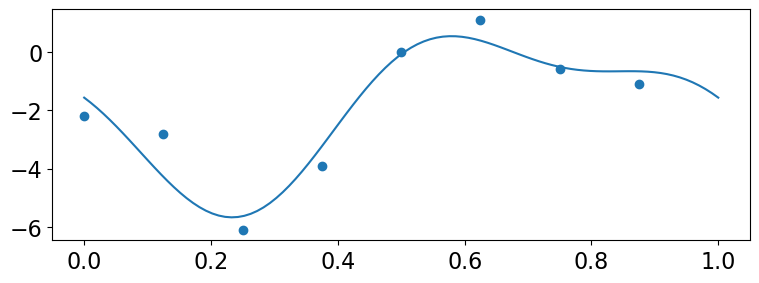

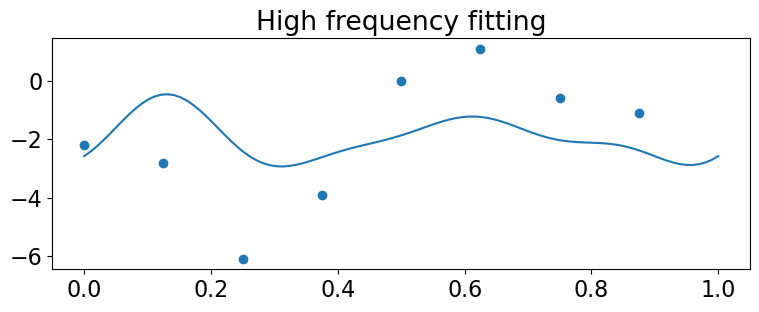

In [14]:
"""
Trigonometric least square
Suggested activity
(a) k = 8 (sanity check), 1, 2, 3, 4, 5, 6, 7, 8
(b) Analogy to Pythagorean theorem.
(c) Toggle on high frequency approximation and repeat (a)
"""

# data to fit
c, d = 0, 1
n = 8
x = np.array([-2.2, -2.8, -6.1, -3.9, 0.0, 1.1, -0.6, -1.1])
t = np.arange(n)*(d-c)/n

# model info
k = 4 # number of basis fns included in fitting
fs = [
lambda t: (1./np.sqrt(n)),
lambda t: (2./np.sqrt(n)) * np.cos(2.*np.pi*(t-c)/(d-c)),
lambda t: (2./np.sqrt(n)) * np.sin(2.*np.pi*(t-c)/(d-c)),
lambda t: (2./np.sqrt(n)) * np.cos(4.*np.pi*(t-c)/(d-c)),
lambda t: (2./np.sqrt(n)) * np.sin(4.*np.pi*(t-c)/(d-c)),
lambda t: (2./np.sqrt(n)) * np.cos(6.*np.pi*(t-c)/(d-c)),
lambda t: (2./np.sqrt(n)) * np.sin(6.*np.pi*(t-c)/(d-c)),
lambda t: (1./np.sqrt(n)) * np.cos(8.*np.pi*(t-c)/(d-c)),
]
cs = [-5.5154, -1.0528, -3.6195, 1.5910, 1.1667, -0.5028, 0.2695, -0.7778]

# plotting parameters
p = 100
tt = np.linspace(c, d, p)

cfs = lin_comb(fs[:k], cs[:k], tt)

plt.figure(figsize=(9, 3))
plt.scatter(t, x)
plt.plot(tt, cfs)
plt.show()

# High frequency fitting
#  constant term added to make comparison fairer.
cfs = lin_comb(fs[-1:-1-k:-1], cs[-1:-1-k:-1], tt)  + cs[0]*fs[0](1.)

plt.figure(figsize=(9, 3))
plt.scatter(t, x)
plt.plot(tt, cfs)
plt.title("High frequency fitting")
plt.show()


**Example** (Denoising; Brunton, Kutz (2019) Data Driven Science & Engineering: Machine Learning, Dynamical Systems, and Control. pp. 69--70)

- Settings
  - A pure signal and white noises are mixed up.
  - Pure signal: $f(t)=\sin \left(2 \pi f_1 t\right)+\sin \left(2 \pi f_2 t\right)$
  - White noise: Random values of intensity 2.5.
- Goal
  - Recover the pure signal by filtering out the noise.


**Remark**

- `numpy.random.randn`: Return a sample (or samples) from the “standard normal” distribution. ([Documentation](https://numpy.org/doc/stable/reference/random/generated/numpy.random.randn.html))

In [17]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [16, 12]
plt.rcParams.update({'font.size': 18})

# Create a simple signal with two frequencies
dt = 0.001
t = np.arange(0,1,dt)
f = np.sin(2*np.pi*50*t) + np.sin(2*np.pi*120*t) # Sum of 2 frequencies
f_clean = f
f = f + 2.5*np.random.randn(len(t))              # Add some noise

In [19]:
## Compute the Fast Fourier Transform (FFT)

n = len(t)
fhat = np.fft.fft(f,n)                     # Compute the FFT
PSD = fhat * np.conj(fhat) / n             # Power spectrum (power per freq)
freq = (1/(dt*n)) * np.arange(n)           # Create x-axis of frequencies in Hz
L = np.arange(1,np.floor(n/2),dtype='int') # Only plot the first half of freqs

In [20]:
## Use the PSD to filter out noise
indices = PSD > 100       # Find all freqs with large power
PSDclean = PSD * indices  # Zero out all others
fhat = indices * fhat     # Zero out small Fourier coeffs. in Y
ffilt = np.fft.ifft(fhat) # Inverse FFT for filtered time signal

/Users/yb/opt/miniconda3/envs/ptrch/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1369: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


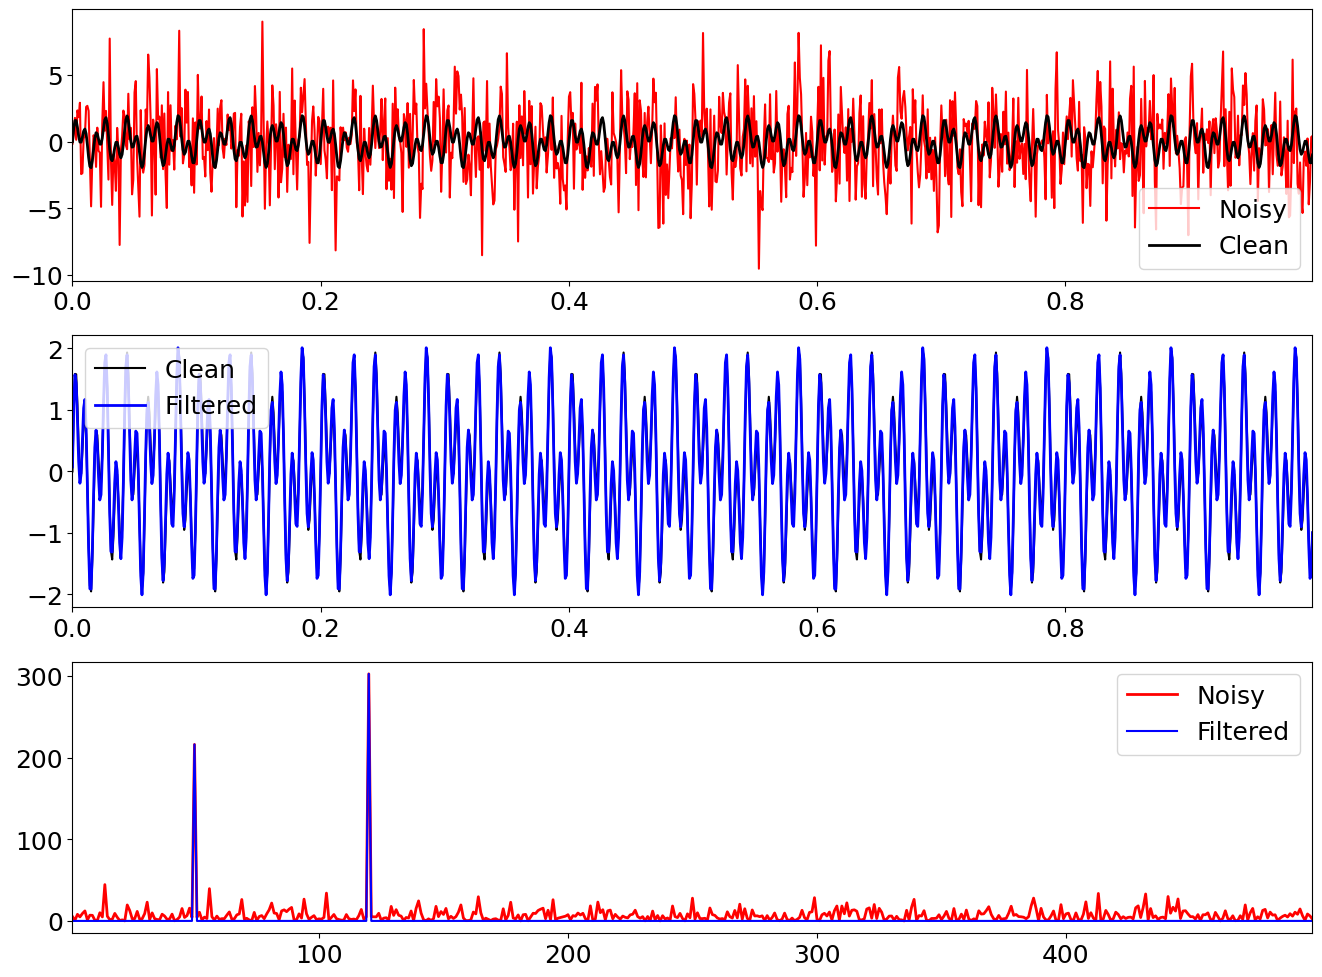

In [21]:
## Plots
fig,axs = plt.subplots(3,1)

plt.sca(axs[0])
plt.plot(t,f,color='r',linewidth=1.5,label='Noisy')
plt.plot(t,f_clean,color='k',linewidth=2,label='Clean')
plt.xlim(t[0],t[-1])
plt.legend()

plt.sca(axs[1])
plt.plot(t,f_clean,color='k',linewidth=1.5,label='Clean')
plt.plot(t,ffilt,color='b',linewidth=2,label='Filtered')
plt.xlim(t[0],t[-1])
plt.legend()

plt.sca(axs[2])
plt.plot(freq[L],PSD[L],color='r',linewidth=2,label='Noisy')
plt.plot(freq[L],PSDclean[L],color='b',linewidth=1.5,label='Filtered')
plt.xlim(freq[L[0]],freq[L[-1]])
plt.legend()

plt.show()

**Remark**

- Notice that we did not locate the frequency ourselves. We just chose some threshold. 